# Tutorial: Time Series Analysis with Pandas

We’ll be covering the following topics:

1. The data set: Open Power Systems Data
2. Time series data structures
3. Time-based indexing
4. Visualizing time series data
5. Seasonality
6. Frequencies
7. Resampling
8. Rolling windows
9. Trends

The data set: Open Power Systems Data

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). 
The columns of the data file are:

1. Date — The date (yyyy-mm-dd format)
2. Consumption — Electricity consumption in GWh
3. Wind — Wind power production in GWh
4. Solar — Solar power production in GWh
5. Wind+Solar — Sum of wind and solar power production in GWh

We will explore how electricity consumption and production have varied over time, using pandas time series tools to answer questions such as:

1. When is electricity consumption typically highest and lowest?
2. How do wind and solar power production vary with seasons of the year?
3. What are the long-term trends in electricity consumption, solar power, and wind power?
4. How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

**Time series data structures**

Let’s import pandas and convert a few dates and times to Timestamps.

In [3]:
import pandas as pd
pd.to_datetime('2020-04-20 10:55am')

Timestamp('2020-04-20 10:55:00')

Creating a time series DataFrame

In [5]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [6]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [7]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Next, let’s check out the data types of each column.

In [8]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [9]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

**Alternatively**

In [10]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [13]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6


**Time-based indexing**

One of the most powerful and convenient features of pandas time series is time-based indexing — using dates and times to intuitively organize and access our data.

In [14]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64

We can also select a slice of days, such as **'2014-01-20':'2014-01-22'**. As with regular label-based indexing with loc, the slice is inclusive of both endpoints

In [16]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1
2014-01-21,1624.806,15.643,5.835,21.478,2014,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1


**Partial-string indexing**

In [18]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2
2012-02-03,1563.631,36.352,46.510,82.862,2012,2
2012-02-04,1372.614,20.551,45.225,65.776,2012,2
2012-02-05,1279.432,55.522,54.572,110.094,2012,2
2012-02-06,1574.766,34.896,55.389,90.285,2012,2
2012-02-07,1615.078,100.312,19.867,120.179,2012,2
2012-02-08,1613.774,93.763,36.930,130.693,2012,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2


**Visualizing time series data**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

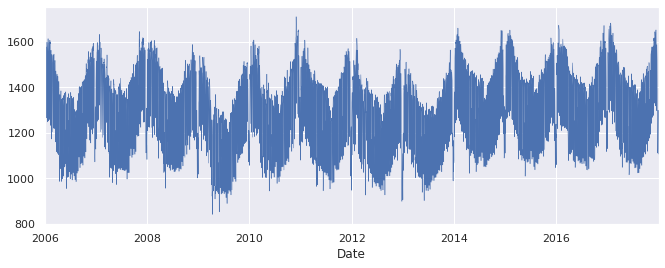

In [21]:
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth=0.5);

- We can see that the plot() method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. 
- However, with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

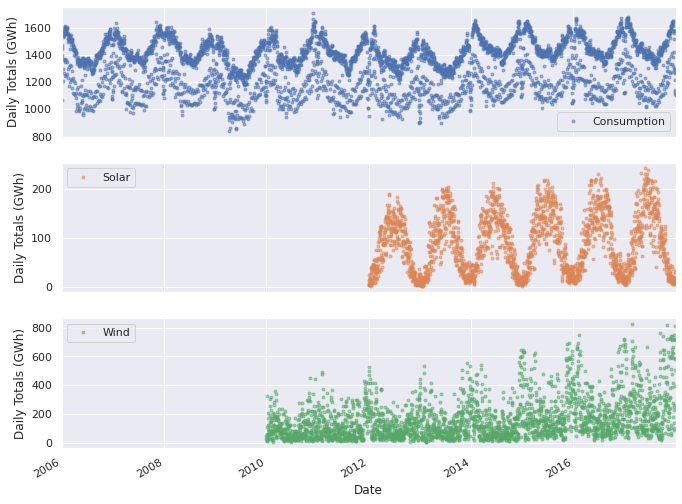

In [22]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

We can already see some interesting patterns emerge:

1. Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.

2. Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.

3. Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.

4. Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.

5. There appears to be a strong increasing trend in wind power production over the years.

<hr/>
All three time series clearly exhibit periodicity—often referred to as seasonality in time series analysis

- Seasonality can also occur on other time scales. 
- The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. 
- Let’s plot the time series in a single year to investigate further.

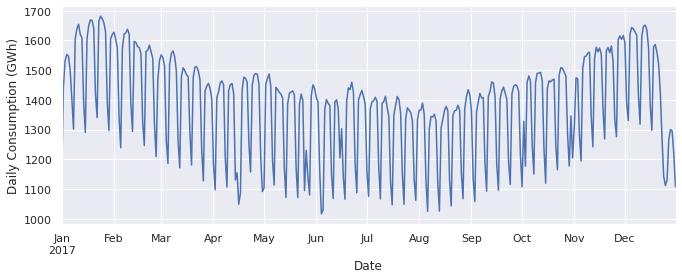

In [23]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Let’s zoom in further and look at just January and February.

Text(0, 0.5, 'Daily Consumption (GWh)')

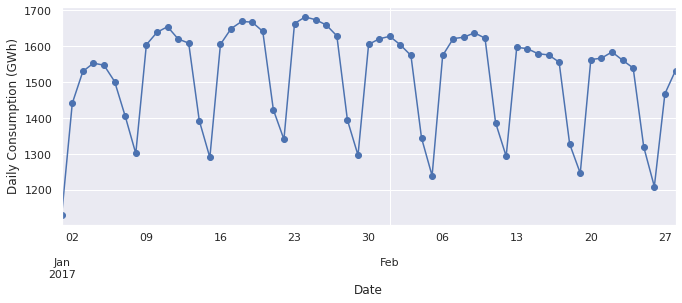

In [24]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

As we suspected, consumption is highest on weekdays and lowest on weekends.

**Seasonality**

We’ll first group the data by month, to visualize yearly seasonality.

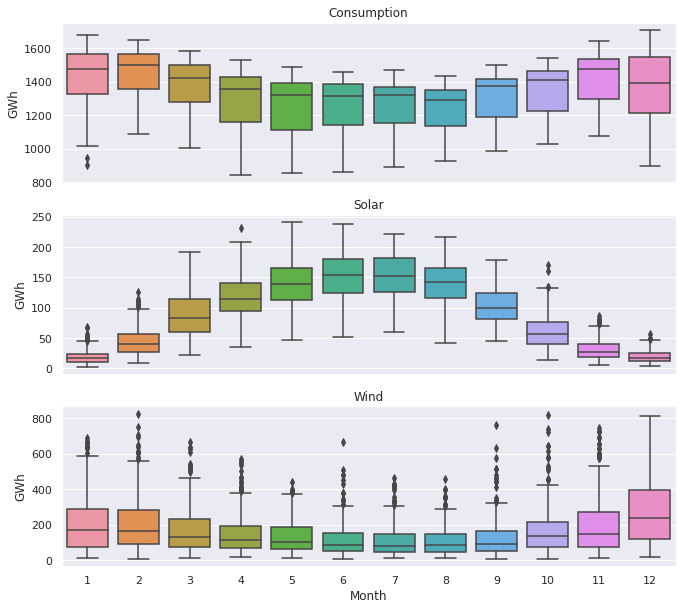

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
       ax.set_xlabel('')

Next, let’s group the electricity consumption time series by day of the week, to explore weekly seasonality.

**Frequencies**

- When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. 
- For example, 
    let’s use the date_range() function to create a sequence of uniformly spaced dates from 1998-03-10 through 1998-03-15 at daily frequency.

In [28]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

- The resulting DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. 
- Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. 
- Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.

- If we know that our data should be at a specific frequency, we can use the DataFrame’s asfreq() method to assign a frequency. 
- If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (NaN), or filled according to a specified data filling method such as forward filling or interpolation.

In [30]:
# To see how this works, let’s create a new DataFrame which contains only the Consumption data 
# for Feb 3, 6, and 8, 2013.

# To select an arbitrary sequence of date/time values from a pandas time series, 
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Now we use the asfreq() method to convert the DataFrame to daily frequency, with a column for unfilled data, and a column for forward filled data.

In [31]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


**Resampling**

- It is often useful to resample our time series data to a lower or higher frequency. 
- Resampling to a lower frequency (downsampling) usually involves an aggregation operation

<br />

- Exploring how it can help us analyze our OPSD data on various time scales. 
- We use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. 
- The resample() method returns a Resampler object, 

In [32]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


- The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. 
- The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on.

- By construction, our weekly time series has 1/7 as many data points as the daily time series. 
- We can confirm this by comparing the number of rows of the two DataFrames.

In [34]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


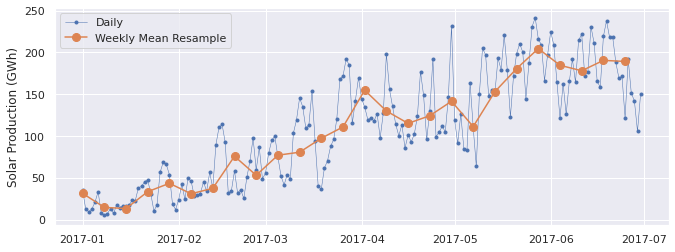

In [35]:
# Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.

# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

- Now let’s resample the data to monthly frequency, aggregating with sum totals instead of the mean. 
- Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. 
- We use the min_count parameter to change this behavior.

In [36]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


You might notice that the monthly resampled data is labelled with the end of each month (the right bin edge), whereas the weekly resampled data is labelled with the left bin edge. 

Text(0, 0.5, 'Monthly Total (GWh)')

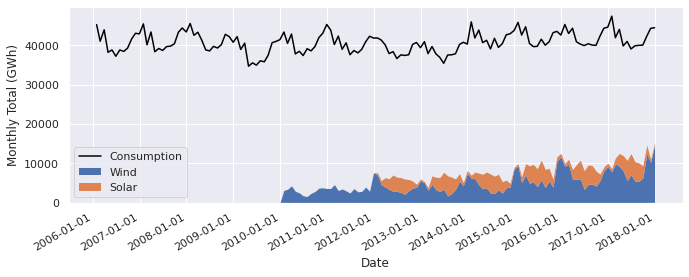

In [38]:
"""
Now let’s explore the monthly time series by plotting the electricity consumption as a line plot, 
and the wind and solar power production together as a stacked area plot.
"""
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')

**Rolling windows**

- Rolling window operations are another important transformation for time series data. 
- Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum()

- Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. 
- We use the center=True argument to label each window at its midpoint, so the rolling windows are:

        2006-01-01 to 2006-01-07 — labelled as 2006-01-04
        2006-01-02 to 2006-01-08 — labelled as 2006-01-05
        2006-01-03 to 2006-01-09 — labelled as 2006-01-06
        and so on…

In [40]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


- To visualize the differences between rolling mean and resampling, 
- let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

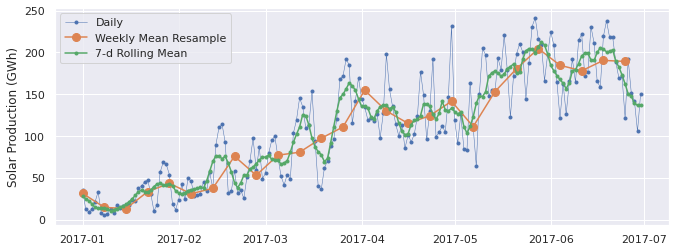

In [41]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. 

**Trends**

- Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. 
- An easy way to visualize these trends is with rolling means at different time scales.

In [42]:
# We’ve already computed 7-day rolling means, so now let’s compute the 365-day rolling mean of our OPSD data.

# The min_periods=360 argument accounts for a few isolated missing days in the 
# wind and solar production time series

opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

Text(0.5, 1.0, 'Trends in Electricity Consumption')

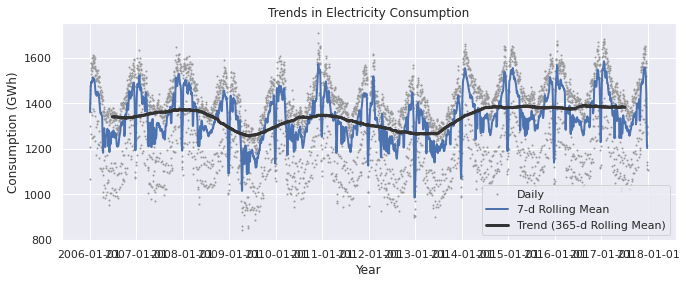

In [43]:
# Let’s plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

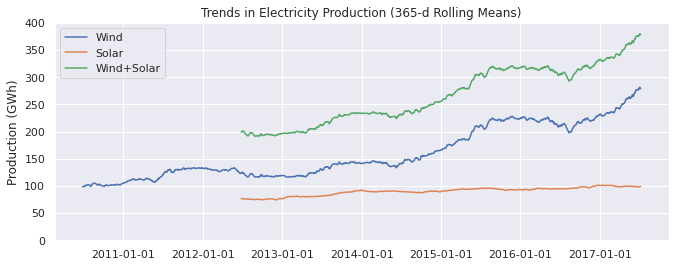

In [44]:
# Now let’s look at trends in wind and solar production.

# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.

## We’ve learned how to wrangle, analyze, and visualize our time series data in pandas using techniques such as time-based indexing, resampling, and rolling windows. 

## Applying these techniques to our OPSD data set, we’ve gained insights on seasonality, trends, and other interesting features of electricity consumption and production